<a href="https://colab.research.google.com/github/Navjotkhatri/EDA-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [203]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/Play Store Data.csv"
ps_df=pd.read_csv(working_dir_path)

# ***Data framing and Data cleaning***

In [206]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [207]:
ps_df.shape

(10841, 13)

In [208]:
working_dir_path2="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/User Reviews.csv"
ps_df2=pd.read_csv(working_dir_path2)

In [209]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [210]:
ps_df2.shape

(64295, 5)

In [211]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [212]:
ps_df[ps_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [213]:
play_store_df=ps_df.drop(ps_df.index[[10472]])

In [214]:
play_store_df.shape

(10840, 13)

In [215]:
play_store_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [216]:
print(list(play_store_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [217]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [218]:
play_store_df = play_store_df.astype({"Reviews": int})

In [219]:
play_store_df['Price'] = play_store_df['Price'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [220]:
play_store_df = play_store_df.astype({"Price": float})

In [221]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [222]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [223]:
df_df=play_store_df["App"].nunique()
df_df

9659

In [224]:
right_df=play_store_df.drop_duplicates(subset='App')
right_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [225]:
right_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [254]:
right_df.Rating.fillna(4.19, inplace=True)


In [227]:
right_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [228]:
number_of_category=right_df["Category"].unique()
print(number_of_category)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [229]:
right_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19M,"10,000,000+",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [230]:
price_df=right_df[["App","Price","Type"]]
price_df

,App,Price,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,Free
1,Coloring book moana,0.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,Free
3,Sketch - Draw & Paint,0.0,Free
4,Pixel Draw - Number Art Coloring Book,0.0,Free
...,...,...,...
10836,Sya9a Maroc - FR,0.0,Free
10837,Fr. Mike Schmitz Audio Teachings,0.0,Free
10838,Parkinson Exercices FR,0.0,Free
10839,The SCP Foundation DB fr nn5n,0.0,Free


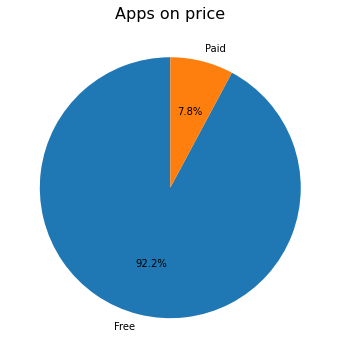

In [231]:
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(price_df.Type.value_counts(), labels=price_df.Type.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()


In [232]:
grouped = right_df[['App','Content Rating']]
grouped

,App,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [233]:
grouped1= grouped.rename(columns={'Content Rating': 'age_group'})
grouped1

,App,age_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


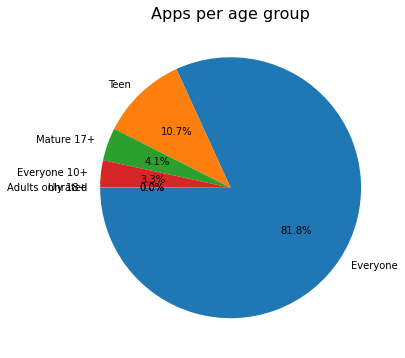

In [234]:
plt.figure(figsize=(10,6))
plt.title("Apps per age group",fontsize = 16)
plt.pie(grouped1.age_group.value_counts(), labels=grouped1.age_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

In [235]:
df=right_df.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df

,Category,Total Apps
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,420
5,COMICS,56
6,COMMUNICATION,315
7,DATING,171
8,EDUCATION,119
9,ENTERTAINMENT,102


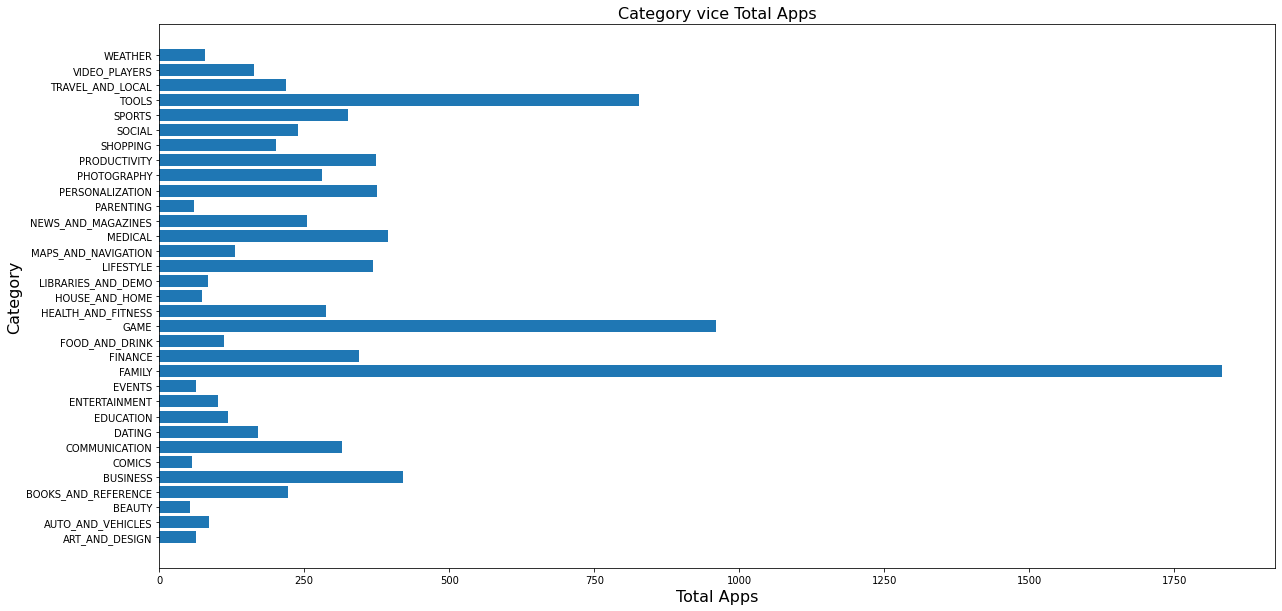

In [236]:
c1=df['Category']
t1= df['Total Apps']
fig = plt.figure(figsize = (20, 10))
plt.barh(c1,t1)
plt.title("Category vice Total Apps",fontsize=16)
plt.xlabel("Total Apps",fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.show()

In [237]:
category=df.sort_values(by='Total Apps', ascending=False)
top_five_category=category.head()
least_five_category=category.tail()

In [238]:
top_five_category.reset_index()

,index,Category,Total Apps
0,11,FAMILY,1832
1,14,GAME,959
2,29,TOOLS,827
3,4,BUSINESS,420
4,20,MEDICAL,395


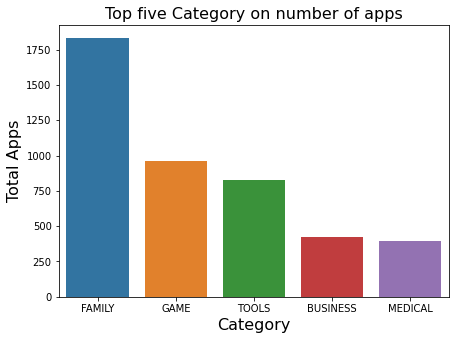

In [239]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=top_five_category, x="Category", y="Total Apps")
plt.title("Top five Category on number of apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [240]:
least_five_category.reset_index()

,index,Category,Total Apps
0,10,EVENTS,64
1,0,ART_AND_DESIGN,64
2,22,PARENTING,60
3,5,COMICS,56
4,2,BEAUTY,53


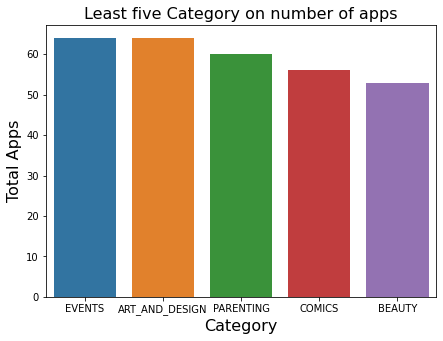

In [241]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=least_five_category, x="Category", y="Total Apps")
plt.title("Least five Category on number of apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [242]:
right_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [243]:
df1 =right_df[["App","Category","Rating","Reviews","Installs","Price","Type","Genres","Content Rating"]]
df1

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,"10,000+",0.0,Free,Art & Design,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,"500,000+",0.0,Free,Art & Design;Pretend Play,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,"5,000,000+",0.0,Free,Art & Design,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,"50,000,000+",0.0,Free,Art & Design,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,"100,000+",0.0,Free,Art & Design;Creativity,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,"5,000+",0.0,Free,Education,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,100+,0.0,Free,Education,Everyone
10838,Parkinson Exercices FR,MEDICAL,4.19,3,"1,000+",0.0,Free,Medical,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,"1,000+",0.0,Free,Books & Reference,Mature 17+


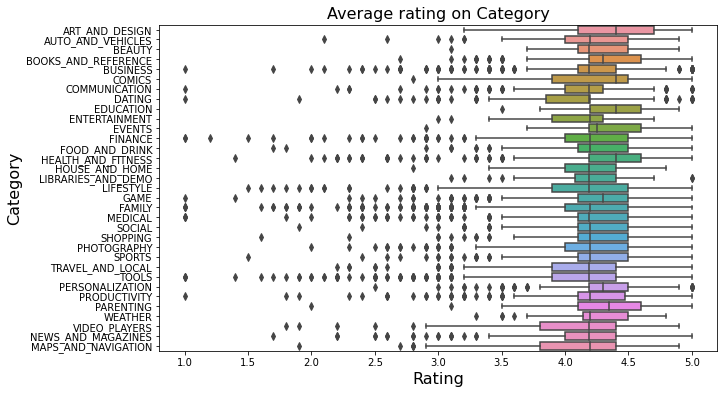

In [244]:
plt.figure(figsize=(10,6))
plt.title("Average rating on Category",fontsize=16)
sns.boxplot(y="Category",x ='Rating',data =df1)
plt.xlabel("Rating",fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.show()

In [245]:
print(np.array(list(df1["Installs"].unique())))

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [246]:
top_installers=df1.sort_values(by='Reviews', ascending=False)
top_apps_by_instolation=top_installers.head(4)


In [247]:
top_apps_by_instolation

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
2544,Facebook,SOCIAL,4.1,78158306,"1,000,000,000+",0.0,Free,Social,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,"1,000,000,000+",0.0,Free,Communication,Everyone
2545,Instagram,SOCIAL,4.5,66577313,"1,000,000,000+",0.0,Free,Social,Teen
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,"1,000,000,000+",0.0,Free,Communication,Everyone


In [248]:
apps_price=df1.sort_values(by='Price', ascending=False)

In [249]:
apps_price.head()

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,"10,000+",400.00,Paid,Lifestyle,Everyone
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.19,0,0+,399.99,Paid,Lifestyle,Everyone
5359,I am rich(premium),FINANCE,3.50,472,"5,000+",399.99,Paid,Finance,Everyone
5358,I am Rich!,FINANCE,3.80,93,"1,000+",399.99,Paid,Finance,Everyone
5373,I AM RICH PRO PLUS,FINANCE,4.00,36,"1,000+",399.99,Paid,Finance,Everyone


In [328]:
reviews_on_price=apps_price.groupby("Reviews")["Price"].sum().reset_index()

In [333]:
reviews_on_price=reviews_on_price.head(250)

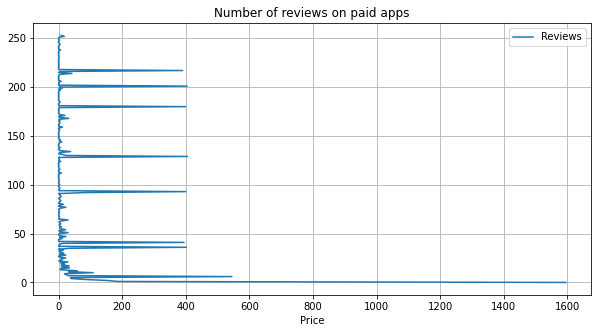

In [340]:
reviews_on_price.plot(x='Price', y='Reviews',figsize=(10,5),grid=True,)
plt.title("Number of reviews on paid apps")
plt.show()